# 🚀 **TF-IDF Zero to Hero**

## 🛠️ Gerekli Kütüphaneler
<span style="color:#1976d2;font-weight:bold;">Python'da TF-IDF için en çok kullanılan kütüphaneler:</span>
- <span style="color:#43a047;font-weight:bold;">scikit-learn</span> (Makine öğrenmesi ve metin işleme)
- <span style="color:#43a047;font-weight:bold;">pandas</span> (Veri analizi)
- <span style="color:#43a047;font-weight:bold;">numpy</span> (Sayısal işlemler)

## ✨ TF-IDF Formülü
<span style="color:#d32f2f;font-weight:bold;">TF (Term Frequency):</span> Bir kelimenin bir dokümanda kaç kez geçtiği.
<span style="color:#1976d2;font-weight:bold;">IDF (Inverse Document Frequency):</span> Kelimenin tüm dokümanlarda ne kadar nadir olduğunu ölçer.
<span style="background-color:#fffde7;color:#fbc02d;font-weight:bold;">TF-IDF = TF x IDF</span>
**Not:** Sık geçen ama her yerde olan kelimeler düşük skor alır.
🔎 <span style="color:#43a047;font-weight:bold;">Anahtar kelime çıkarımı için idealdir.</span>

In [1]:
# Kütüphaneleri yükleyelim ve import edelim
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

## ⚡ Uygulama Adımları
1. <span style="color:#1976d2;font-weight:bold;">Veri Yükleme</span>
2. <span style="color:#43a047;font-weight:bold;">Ön işleme</span> (temizleme, küçük harfe çevirme, noktalama işaretlerini kaldırma)
3. <span style="color:#fbc02d;font-weight:bold;">TF-IDF Dönüşümü</span>
4. <span style="color:#d32f2f;font-weight:bold;">Sonuçların Analizi</span>
---
**İpucu:** <span style="color:#43a047;font-weight:bold;">Her adımda kodun yanında açıklama ekleyin!</span>

## 📝 Sonuç ve Yorum
<span style="color:#1976d2;font-weight:bold;">TF-IDF ile metinlerdeki en anlamlı kelimeleri bulabilirsiniz.</span>
<span style="color:#d32f2f;font-weight:bold;">Dikkat:</span> Çok kısa veya çok uzun dokümanlarda skorlar yanıltıcı olabilir.

In [2]:
# Örnek veri kümesi
corpus = [
    "Köpek çok tatlı bir hayvandır.",
    "Köpek ve kuşlar çok tatlı hayvanlardır.",
    "İnekler süt üretirler.",
    "Kuşlar göç eder.",
    "Köpekler sadıktır."
]

# DataFrame'e dönüştürelim
df = pd.DataFrame({'text': corpus})
df

,text
0,Köpek çok tatlı bir hayvandır.
1,Köpek ve kuşlar çok tatlı hayvanlardır.
2,İnekler süt üretirler.
3,Kuşlar göç eder.
4,Köpekler sadıktır.


In [3]:
# Adım 1: Basit örnek metinlerle TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

metinler = [
    "Kediler çok sevimlidir. Kediler oyuncudur.",
    "Köpekler sadıktır. Köpekler hızlı koşar.",
    "Kuşlar uçar. Kuşlar ötüşleriyle ünlüdür."
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(metinler)

# Sonuçları tablo olarak göster
pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

,hızlı,kediler,koşar,kuşlar,köpekler,oyuncudur,sadıktır,sevimlidir,uçar,çok,ötüşleriyle,ünlüdür
0,0.000000,0.755929,0.000000,0.000000,0.000000,0.377964,0.000000,0.377964,0.000000,0.377964,0.000000,0.000000
1,0.377964,0.000000,0.377964,0.000000,0.755929,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.755929,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.377964,0.377964


## 🎯 Ekstra Bilgi
- <span style="color:#43a047;font-weight:bold;">Stopwords</span> (önemsiz kelimeler) genellikle TF-IDF hesaplamasından çıkarılır.
- <span style="color:#1976d2;font-weight:bold;">TF-IDF</span> vektörleri makine öğrenmesi modellerinde özellik olarak kullanılabilir.
- <span style="color:#fbc02d;font-weight:bold;">scikit-learn</span> ile kolayca uygulanabilir.

In [4]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess(text):
    # Küçük harfe çevir
    text = text.lower()
    # Noktalama işaretlerini kaldır
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenizasyon
    tokens = text.split()
    # Stopword çıkarımı (Türkçe için özel stopword listesi eklenebilir)
    stopwords = set(['ve', 'bir', 'çok', 'ile', 'için', 'da', 'de', 'bu', 'şu', 'mu', 'mü', 'mi', 'ama', 'fakat', 'ancak'])
    tokens = [t for t in tokens if t not in stopwords]
    return ' '.join(tokens)

# Tüm metinleri temizle
df['clean_text'] = df['text'].apply(preprocess)
df[['text', 'clean_text']]

,text,clean_text
0,Köpek çok tatlı bir hayvandır.,köpek tatlı hayvandır
1,Köpek ve kuşlar çok tatlı hayvanlardır.,köpek kuşlar tatlı hayvanlardır
2,İnekler süt üretirler.,inekler süt üretirler
3,Kuşlar göç eder.,kuşlar göç eder
4,Köpekler sadıktır.,köpekler sadıktır


In [6]:
# Adım 2: sms_spam.csv veri seti ile TF-IDF uygulaması
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Veri setini yükle
sms_df = pd.read_csv('sms_spam.csv')

In [7]:
# Mesajları ve etiketleri incele
sms_df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Temizleme (isteğe bağlı, örnek)
sms_df['text_clean'] = sms_df['text'].str.lower().str.replace(r'[^a-zçğıöşü\s]', '', regex=True)
sms_df.head()

,type,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [10]:
# TF-IDF hesapla
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sms_df['text_clean'])

# Sonuçları tablo olarak göster
pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out()).head()

,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada,üll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Cemal\AppData\Local\Temp\ipykernel_16752\4028305177.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_tfidf[top_indices], y=kelimeler[top_indices], palette='viridis')


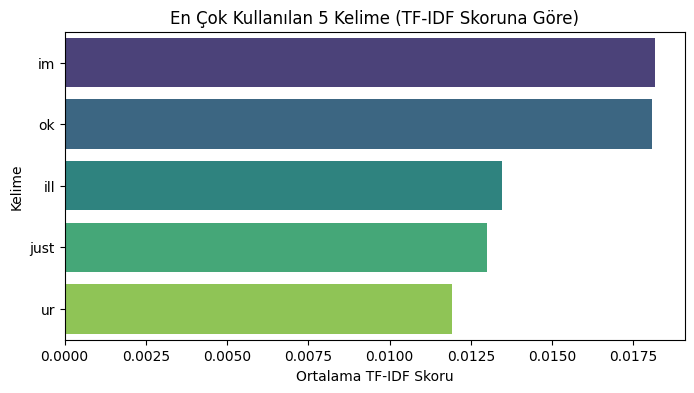

In [11]:
# En çok kullanılan 5 kelimeyi görselleştir
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ortalama TF-IDF skorlarını bul
mean_tfidf = np.mean(tfidf_matrix.toarray(), axis=0)
kelimeler = vectorizer.get_feature_names_out()

# En yüksek 5 kelimeyi seç
top_indices = np.argsort(mean_tfidf)[-5:][::-1]
plt.figure(figsize=(8,4))
sns.barplot(x=mean_tfidf[top_indices], y=kelimeler[top_indices], palette='viridis')
plt.title('En Çok Kullanılan 5 Kelime (TF-IDF Skoruna Göre)')
plt.xlabel('Ortalama TF-IDF Skoru')
plt.ylabel('Kelime')
plt.show()